<a href="https://colab.research.google.com/github/BrenaSt/DataScience-TelecomX-2.0/blob/main/TelecomX_BR_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TelecomX - PARTE 2: Prevendo o Churn**

🎯 Missão

A missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e para isso irei construir um pipeline robusto para essa etapa inicial de modelagem.


---


🧠 Objetivos do Desafio

* Preparar os dados para a modelagem (tratamento, encoding, normalização).

* Realizar análise de correlação e seleção de variáveis.

* Treinar dois ou mais modelos de classificação.

* Avaliar o desempenho dos modelos com métricas.

* Interpretar os resultados, incluindo a importância das variáveis.

* Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

---

🧰 O que esta sendo praticado

  * ✅ Pré-processamento de dados para Machine Learning

  * ✅ Construção e avaliação de modelos preditivos

  * ✅ Interpretação dos resultados e entrega de insights

  * ✅ Comunicação técnica com foco estratégico

# 📌 **Extração Dos Dados Tratados**

In [181]:
import pandas as pd

In [182]:
url = 'https://raw.githubusercontent.com/BrenaSt/DataScience-TelecomX-2.0/refs/heads/main/df_analise_churn%20(1).csv'

dados = pd.read_csv(url)
dados.head()

,id_cliente,churn,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,0002-ORFBO,0,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.6,593.5,2.186667
1,0003-MKNFE,0,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.9,542.5,1.996667
2,0004-TLHLJ,1,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.9,280.8,2.463333
3,0011-IGKFF,1,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.0,1238.0,3.266667
4,0013-EXCHZ,1,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.9,267.5,2.796667


In [183]:
dados.columns

Index(['id_cliente', 'churn', 'genero', 'meses_contrato', 'tipo_contrato',
       'forma_pagamento', 'fatura_online', 'servico_telefone', 'internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'gasto_mensal',
       'total_gasto', 'contas_diarias'],
      dtype='object')

In [184]:
dados.rename(columns={'churn': 'evasao'}, inplace = True)
dados.head()

,id_cliente,evasao,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,0002-ORFBO,0,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.6,593.5,2.186667
1,0003-MKNFE,0,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.9,542.5,1.996667
2,0004-TLHLJ,1,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.9,280.8,2.463333
3,0011-IGKFF,1,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.0,1238.0,3.266667
4,0013-EXCHZ,1,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.9,267.5,2.796667


# **🛠️ Preparação dos Dados**

**Remoção de Colunas Irrelevantes**

A coluna id_cliente é a única que, nesse contexto, não contribui para a previsão do churn (evasão de clientes), pois é apenas um identificador único. Ela não carrega nenhuma informação útil para os modelos preditivos e pode atrapalhar, por isso ela será removida.

In [185]:
dados = dados.drop(columns=['id_cliente'])
dados.head()

,evasao,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,0,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.6,593.5,2.186667
1,0,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.9,542.5,1.996667
2,1,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.9,280.8,2.463333
3,1,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.0,1238.0,3.266667
4,1,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.9,267.5,2.796667


**Verificação da Proporção de Evasão**

Proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalindo se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [186]:
proporcao_evasao = (dados.evasao.value_counts(normalize=True)*100).to_frame()
proporcao_evasao = proporcao_evasao.reset_index()
proporcao_evasao

,evasao,proportion
0,0,74.280996
1,1,25.719004


In [187]:
import plotly.express as px

fig = px.bar(proporcao_evasao, x='evasao', y='proportion', color='evasao', text_auto=True)
fig.update_layout(title='Proporção de Evasão vs Permanência', yaxis_title='Proporção (%)')
fig.show()

## **Encoding**

Transformando as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning.

In [188]:
x = dados.drop("evasao", axis = 1)
y = dados['evasao']

In [189]:
x

,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.60,593.50,2.186667
1,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.90,542.50,1.996667
2,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.90,280.80,2.463333
3,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.00,1238.00,3.266667
4,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.90,267.50,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,female,13,one year,mailed check,0,1,1,1,0,0,1,0,0,55.15,743.00,1.838333
7263,male,22,month-to-month,electronic check,1,1,1,0,0,0,0,0,1,85.10,1874.00,2.836667
7264,male,2,month-to-month,mailed check,1,1,1,0,1,0,0,0,0,50.30,92.75,1.676667
7265,male,67,two year,mailed check,0,1,1,1,0,1,1,0,1,67.85,4628.00,2.261667


In [190]:
y

,evasao
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


**Tratando os dados das variáveis independentes (x)**

In [191]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [192]:
colunas = x.columns
colunas

Index(['genero', 'meses_contrato', 'tipo_contrato', 'forma_pagamento',
       'fatura_online', 'servico_telefone', 'internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'gasto_mensal', 'total_gasto',
       'contas_diarias'],
      dtype='object')

In [193]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['genero', 'tipo_contrato', 'forma_pagamento', 'fatura_online', 'servico_telefone', 'internet','seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [194]:
x = one_hot.fit_transform(x)

In [195]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__genero_male',
       'onehotencoder__tipo_contrato_month-to-month',
       'onehotencoder__tipo_contrato_one year',
       'onehotencoder__tipo_contrato_two year',
       'onehotencoder__forma_pagamento_bank transfer (automatic)',
       'onehotencoder__forma_pagamento_credit card (automatic)',
       'onehotencoder__forma_pagamento_electronic check',
       'onehotencoder__forma_pagamento_mailed check',
       'onehotencoder__fatura_online_1',
       'onehotencoder__servico_telefone_1', 'onehotencoder__internet_1',
       'onehotencoder__seguranca_online_1',
       'onehotencoder__backup_online_1',
       'onehotencoder__protecao_dispositivo_1',
       'onehotencoder__suporte_tecnico_1',
       'onehotencoder__tv_streaming_1',
       'onehotencoder__filmes_streaming_1', 'remainder__meses_contrato',
       'remainder__gasto_mensal', 'remainder__total_gasto',
       'remainder__contas_diarias'], dtype=object)

In [196]:
x = pd.DataFrame(x, columns= one_hot.get_feature_names_out(colunas))

**Tratando os dados da variável alvo (y)**

In [197]:
from sklearn.preprocessing import LabelEncoder

In [198]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

**Normalização**

# **📊 Correlação e Seleção de Variáveis**

**Análise Descritiva**

In [199]:
dados.describe().round(2)

,evasao,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
count,7267.00,7267.00,7267.00,7267.0,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00,7267.00
mean,0.26,32.35,0.59,0.9,0.78,0.29,0.34,0.34,0.29,0.38,0.39,64.72,2277.18,2.16
std,0.44,24.57,0.49,0.3,0.41,0.45,0.48,0.47,0.45,0.49,0.49,30.13,2268.64,1.00
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,0.00,0.61
25%,0.00,9.00,0.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,35.42,396.10,1.18
50%,0.00,29.00,1.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,70.30,1389.00,2.34
75%,1.00,55.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.88,3778.00,3.00
max,1.00,72.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8690.00,3.96


**Análise de Correlação**

Visualizando a matriz de correlação para identificar relações entre variáveis numéricas e booleanas.

In [200]:
corr = dados.select_dtypes(include='number').corr().round(4)
corr

,evasao,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
evasao,1.0000,-0.3441,0.1867,0.0126,0.2241,-0.1668,-0.0802,-0.0635,-0.1604,0.0624,0.0606,0.1899,-0.1933,0.1899
meses_contrato,-0.3441,1.0000,0.0079,0.0102,0.0370,0.3273,0.3613,0.3618,0.3221,0.2807,0.2868,0.2480,0.8254,0.2480
fatura_online,0.1867,0.0079,1.0000,0.0136,0.3245,-0.0017,0.1312,0.1052,0.0376,0.2246,0.2124,0.3537,0.1600,0.3537
servico_telefone,0.0126,0.0102,0.0136,1.0000,-0.1731,-0.0933,-0.0522,-0.0730,-0.0976,-0.0254,-0.0343,0.2467,0.1140,0.2467
internet,0.2241,0.0370,0.3245,-0.1731,1.0000,0.3337,0.3823,0.3808,0.3366,0.4163,0.4194,0.7638,0.3749,0.7638
seguranca_online,-0.1668,0.3273,-0.0017,-0.0933,0.3337,1.0000,0.2864,0.2757,0.3561,0.1773,0.1899,0.2983,0.4128,0.2983
backup_online,-0.0802,0.3613,0.1312,-0.0522,0.3823,0.2864,1.0000,0.3067,0.2924,0.2832,0.2768,0.4430,0.5120,0.4430
protecao_dispositivo,-0.0635,0.3618,0.1052,-0.0730,0.3808,0.2757,0.3067,1.0000,0.3323,0.3944,0.4027,0.4836,0.5238,0.4836
suporte_tecnico,-0.1604,0.3221,0.0376,-0.0976,0.3366,0.3561,0.2924,0.3323,1.0000,0.2784,0.2801,0.3384,0.4310,0.3384
tv_streaming,0.0624,0.2807,0.2246,-0.0254,0.4163,0.1773,0.2832,0.3944,0.2784,1.0000,0.5313,0.6289,0.5162,0.6289


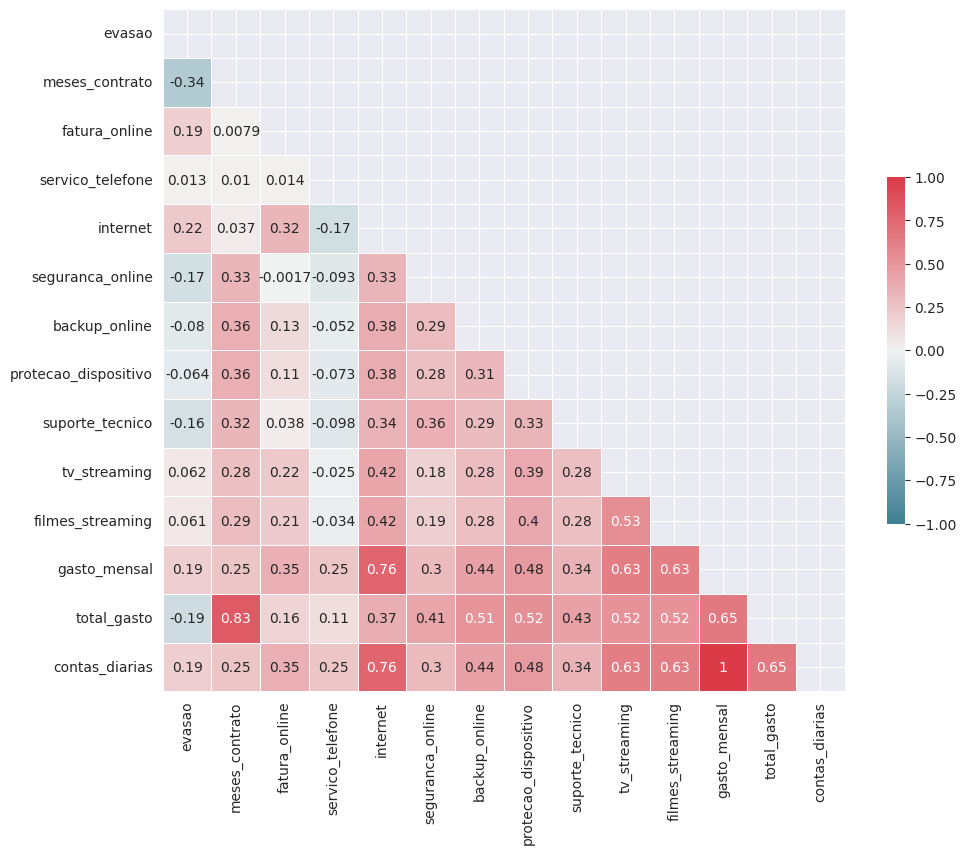

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Analisando a matriz de correlação pode-se perceber que não há grande correlação das variáveis independentes com evasão dos clientes. As maiores correlações foram:

* meses_contrato: -0.34 (inversamente proporcional)
* fatura_online: 0.19
* interneet: 0.22
* seguranca_online: -0.17
* suporte_tecnico: -0.16
* gasto_mensal: 0.19
* total_gasto: -0.19
* contas_diarias: 0.19

As outras variáveis tiveram uma correlação muito baixa em relação a evasão.

**Análises Direcionadas**

Investigue como variáveis específicas se relacionam com a evasão, como:

* Tempo de contrato × Evasão
* Total gasto × Evasão

In [202]:
# Importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_palette("nipy_spectral")
sns.set_style("darkgrid")

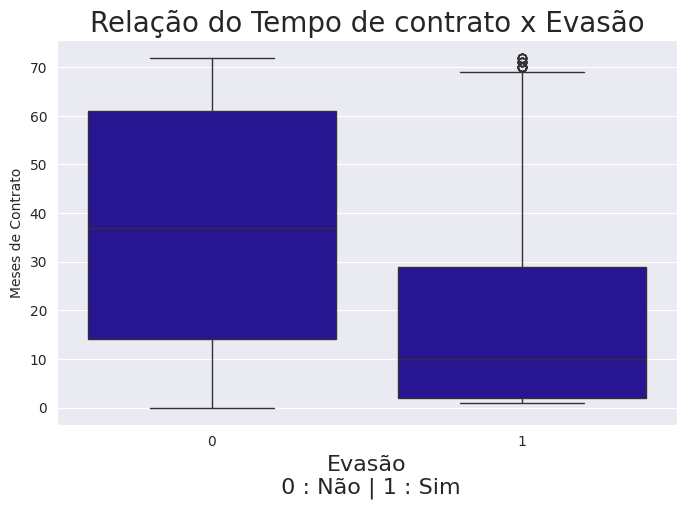

In [203]:
# Relação do Tempo de contrato x Evasão
ax = sns.boxplot(data=dados, x ='evasao', y = 'meses_contrato')
ax.figure.set_size_inches(8, 5)
ax.set_title('Relação do Tempo de contrato x Evasão', fontsize=20)
ax.set_xlabel('Evasão\n 0 : Não | 1 : Sim', fontsize=16)
ax.set_ylabel('Meses de Contrato')
plt.show()

A relação do tempo de contrato e a evasão, se encontra mais simetrica nos casos que não tiveram uma evasão, com a mediana dos tempos de contrato concentrato sendo maior, entre 30 e 40 meses. Enquanto para os casos que houve evasão o tempo de contrato teve uma assimetria para a direita, com tempos de contrato menores, onde a mediada esta mais concentrata entre 0 e 10 meses de contrato, com alguns poucos outliers em 70 meses.

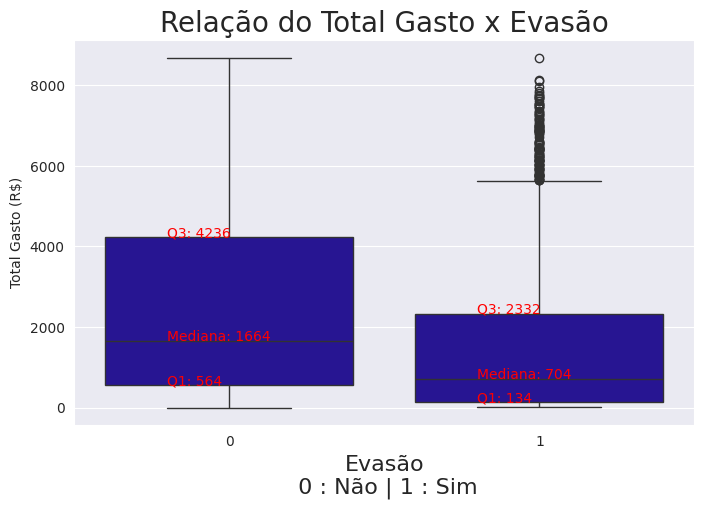

In [204]:
# Relação do Total Gasto x Evasão

quartis = dados.groupby('evasao')['total_gasto'].quantile([0.25, 0.5, 0.75]).unstack()
quartis.columns = ['Q1', 'Mediana', 'Q3']
quartis

ax = sns.boxplot(data=dados, x ='evasao', y = 'total_gasto')
ax.figure.set_size_inches(8, 5)
ax.set_title('Relação do Total Gasto x Evasão', fontsize=20)
ax.set_xlabel('Evasão\n 0 : Não | 1 : Sim', fontsize=16)
ax.set_ylabel('Total Gasto (R$)')

for i in range(len(quartis)):
    categoria = quartis.index[i]
    q1 = quartis.iloc[i]['Q1']
    mediana = quartis.iloc[i]['Mediana']
    q3 = quartis.iloc[i]['Q3']

    # Adiciona o texto no gráfico
    ax.text(i - 0.2, q1, f'Q1: {q1:.0f}', color='red', fontsize=10)
    ax.text(i - 0.2, mediana, f'Mediana: {mediana:.0f}', color='red', fontsize=10)
    ax.text(i - 0.2, q3, f'Q3: {q3:.0f}', color='red', fontsize=10)

plt.show()

Já na relação entre Total Gasto e a Evasão, nos casos de não evasão, temos uma relação assimetrica a direita com uma concentração maior entre R$1600,00 e R$4200,00 reais de total gasto, e a mediana se encontra abaixo dos R$2000,00.

Na situação de ocorrencia da evasão também temos uma assimetria a direita, ainda maior, onde a concentração de valores variam entre R$700,00 e R$2300,00 , com varios outliers em torno de R$6000,00 e R$8000,00.   

# **🤖 Modelagem Preditiva**

**Separação de Dados**

Dividindo o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão de 70% para treino e 30% para teste.

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3 ,stratify = y)

### **Criação de Modelos**

**Modelo Base**

In [207]:
from sklearn.dummy import DummyClassifier

In [208]:
dummy = DummyClassifier()

In [209]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

print(f"Acurácia: {dummy.score(x_teste, y_teste)}")

Acurácia: 0.7427785419532325


**Normalização dos Dados**

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [212]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.791667,0.408458,0.376755,0.408458
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.916667,0.654229,0.657768,0.654229
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.986111,0.800000,0.801381,0.800000
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.986111,0.062687,0.197814,0.062687
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.250746,0.039758,0.250746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.847222,0.963682,0.806674,0.963682
5082,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.388889,0.874129,0.327733,0.874129
5083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.021891,0.029390,0.021891
5084,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.277778,0.407463,0.137054,0.407463


In [213]:
x_teste_normalizado = normalizacao.transform(x_teste)
pd.DataFrame(x_teste_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.069444,0.668159,0.046145,0.668159
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.013889,0.121891,0.003510,0.121891
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.902778,0.806965,0.730495,0.806965
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.319444,0.414925,0.161795,0.414925
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.847222,0.014925,0.129344,0.014925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.833333,0.620398,0.569390,0.620398
2177,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.738308,0.741082,0.738308
2178,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.736111,0.072637,0.153740,0.072637
2179,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.944444,0.644279,0.654085,0.644279


**Modelo KNN**

O algoritmo KNN (K-Nearest Neighbors) foi escolhido por ser um modelo simples, de fácil compreensão e implementação, além de apresentar bons resultados em problemas de classificação com dados bem preparados. No entanto, uma característica importante do KNN é que ele é fortemente influenciado pela escala dos dados, pois seu funcionamento se baseia no cálculo de distâncias entre os pontos para determinar a classe mais próxima.

Sem normalização, variáveis com escalas maiores (como “Total Gasto”) poderiam dominar o cálculo de distância, distorcendo os resultados e reduzindo a eficácia do modelo. Por isso, aplicou-se a normalização dos dados.

In [214]:
from sklearn.neighbors import KNeighborsClassifier

In [215]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [216]:
print(f"Acurácia: {modelo_knn.score(x_teste_normalizado, y_teste)}")

Acurácia: 0.7657038055937643


**Modelo Árvore de Decisão**

A árvore de decisão foi escolhida por ser um algoritmo de fácil interpretação, permitindo a visualização clara do processo de tomada de decisão por meio de regras simples baseadas nas variáveis do conjunto de dados. Essa característica é especialmente útil para compreender quais atributos mais influenciam o resultado final, tornando o modelo explicável até mesmo para pessoas sem conhecimento técnico aprofundado em machine learning.

Além disso, a árvore de decisão é robusta a dados que não foram normalizados, o que elimina a necessidade de pré-processamentos complexos nesse aspecto. Ela também lida bem com dados categóricos e contínuos, adapta-se facilmente a diferentes formatos de entrada e apresenta bom desempenho em problemas com variáveis bem definidas.

Essas características tornam o modelo adequado para a fase inicial de construção e análise de modelos preditivos, facilitando tanto a validação dos dados quanto a comunicação dos resultados.

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [219]:
print(f"Acurácia: {modelo_arvore.score(x_teste, y_teste)}")

Acurácia: 0.7808344795965153


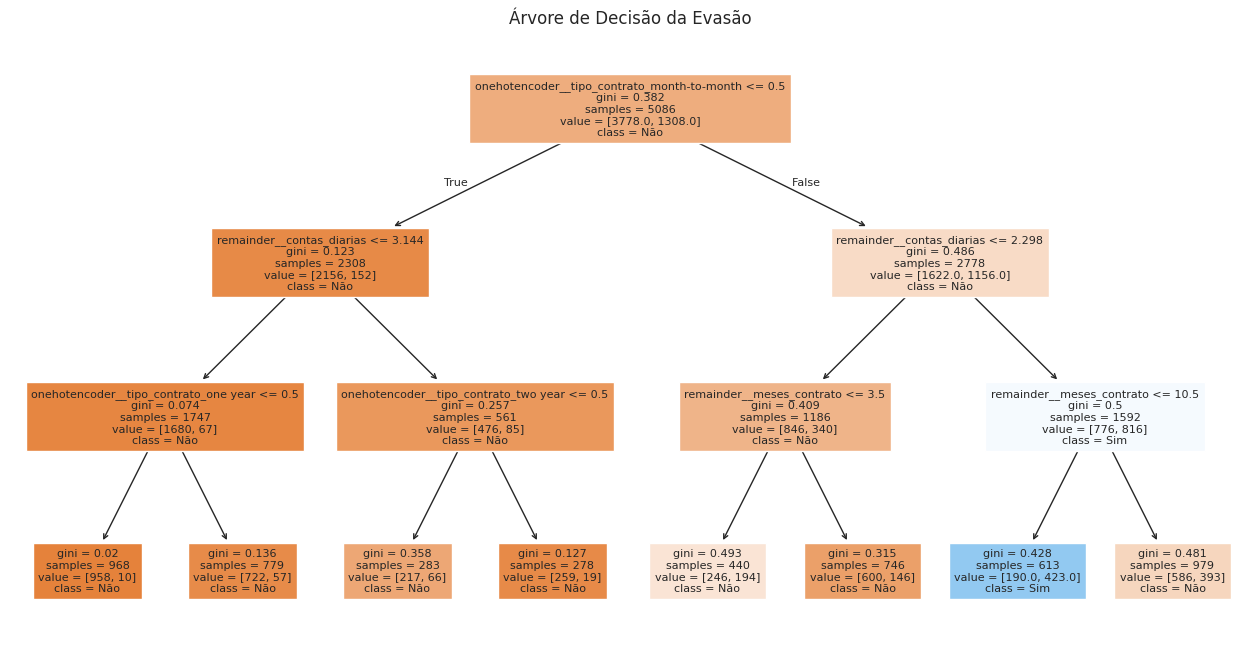

In [220]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(modelo_arvore, filled=True, feature_names=x.columns, class_names=["Não", "Sim"], fontsize=8)
plt.title("Árvore de Decisão da Evasão")
plt.show()

### **Avaliação dos Modelos**

In [221]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

**Modelo KNN**

In [222]:
y_previsto = modelo_knn.predict(x_teste_normalizado)
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print("MATRIZ DE CONFUSÃO:\n", matriz_confusao)

MATRIZ DE CONFUSÃO:
 [[1394  226]
 [ 285  276]]



MODELO KNN

MATRIZ DE CONFUSÃO:



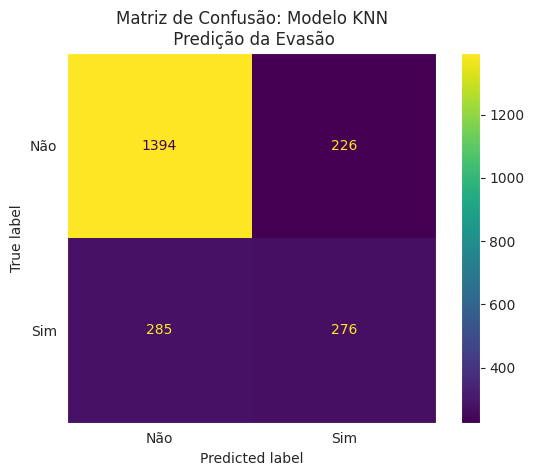


MÉTRICAS DE AVALIAÇÃO:

Acurácia: 0.7657038055937643

Precisão: 0.549800796812749

Revocação: 0.4919786096256685

F1-score: 0.5192850423330198


In [223]:
print(f'\nMODELO KNN\n')

y_previsto = modelo_knn.predict(x_teste_normalizado)
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print("MATRIZ DE CONFUSÃO:\n")

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots()
ax.set_title("Matriz de Confusão: Modelo KNN\n Predição da Evasão")
visualizacao.plot(ax=ax)
ax.grid(False)

plt.show()

print("\nMÉTRICAS DE AVALIAÇÃO:")
print(f'\nAcurácia: {accuracy_score(y_teste, y_previsto)}\n')
print(f'Precisão: {precision_score(y_teste, y_previsto)}\n')
print(f'Revocação: {recall_score(y_teste, y_previsto)}\n')
print(f'F1-score: {f1_score(y_teste, y_previsto)}')

**Modelo Árvore de Decisão**

In [224]:
y_previsto = modelo_arvore.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print("MATRIZ DE CONFUSÃO:\n", matriz_confusao)

MATRIZ DE CONFUSÃO:
 [[1522   98]
 [ 380  181]]



MODELO ARVORE DE DECISÃO

MATRIZ DE CONFUSÃO:



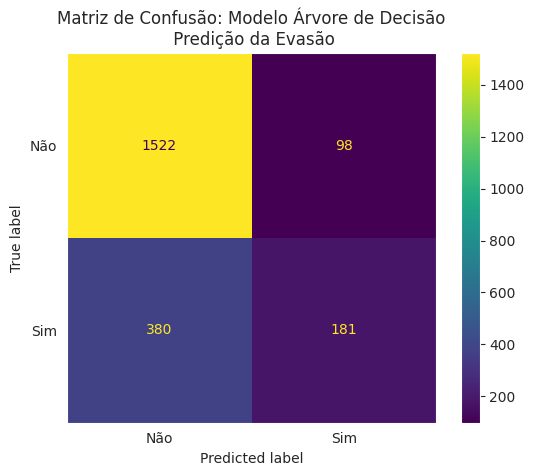


MÉTRICAS DE AVALIAÇÃO:

Acurácia: 0.7808344795965153

Precisão: 0.6487455197132617

Revocação: 0.3226381461675579

F1-score: 0.430952380952381


In [225]:
print(f'\nMODELO ARVORE DE DECISÃO\n')

y_previsto = modelo_arvore.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print('MATRIZ DE CONFUSÃO:\n')

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots()
ax.set_title("Matriz de Confusão: Modelo Árvore de Decisão\n Predição da Evasão")
visualizacao.plot(ax=ax)
ax.grid(False)

plt.show()

print("\nMÉTRICAS DE AVALIAÇÃO:")
print(f'\nAcurácia: {accuracy_score(y_teste, y_previsto)}\n')
print(f'Precisão: {precision_score(y_teste, y_previsto)}\n')
print(f'Revocação: {recall_score(y_teste, y_previsto)}\n')
print(f'F1-score: {f1_score(y_teste, y_previsto)}')

🔍**Análise do Modelo KNN**

* Acurácia (76,47%): Indica um desempenho razoável no geral, mas não necessariamente um bom equilíbrio entre classes.

* Precisão (54,88%): Mostra que, entre as previsões positivas do modelo, pouco mais da metade estavam corretas. Isso indica uma taxa considerável de falsos positivos.

* Recall (48,13%): O modelo não conseguiu capturar bem todos os positivos reais, ou seja, muitos casos da classe positiva foram classificados incorretamente.

* F1-score (51,28%): A baixa harmonia entre precisão e recall indica que o modelo ainda tem dificuldade em lidar com a classe positiva.

* Matriz de confusão: 291 falsos negativos e 222 falsos positivos — o modelo teve uma performance melhor na classe negativa do que na positiva.

**Interpretação:**

O KNN apresenta uma certa dificuldade em generalizar, principalmente para a classe positiva. A baixa recall sugere que muitos casos importantes estão sendo ignorados, o que pode ser crítico dependendo da aplicação. O modelo está mais próximo de um underfitting leve, provavelmente por uma configuração não ideal do número de vizinhos (k) ou pela sensibilidade do algoritmo à escala e distribuição dos dados.

🌳 **Análise do Modelo Árvore de Decisão**

* Acurácia (78,73%): Levemente superior à do KNN, sugerindo uma melhor performance geral.

* Precisão (64,83%): Melhor que o KNN, indicando uma taxa menor de falsos positivos.

* Recall (37,78%): Pior que o KNN — o modelo deixou de identificar uma grande quantidade de positivos reais.

* F1-score (47,75%): Ainda mais baixo que o do KNN, pois o recall está bem comprometido.

* Matriz de confusão: 349 falsos negativos e 115 falsos positivos — o modelo tende a classificar mais como negativo do que positivo.

**Interpretação:**

A Árvore de Decisão foi mais conservadora ao prever a classe positiva. Apesar de ter melhor precisão, o recall caiu bastante, o que pode indicar um problema de underfitting em relação a essa classe. Isso pode ser devido à profundidade da árvore estar muito limitada, o que impede a captura de padrões mais complexos.

# **🔍 Análise de Importância das Variáveis**

**KNN (K-Nearest Neighbors)**

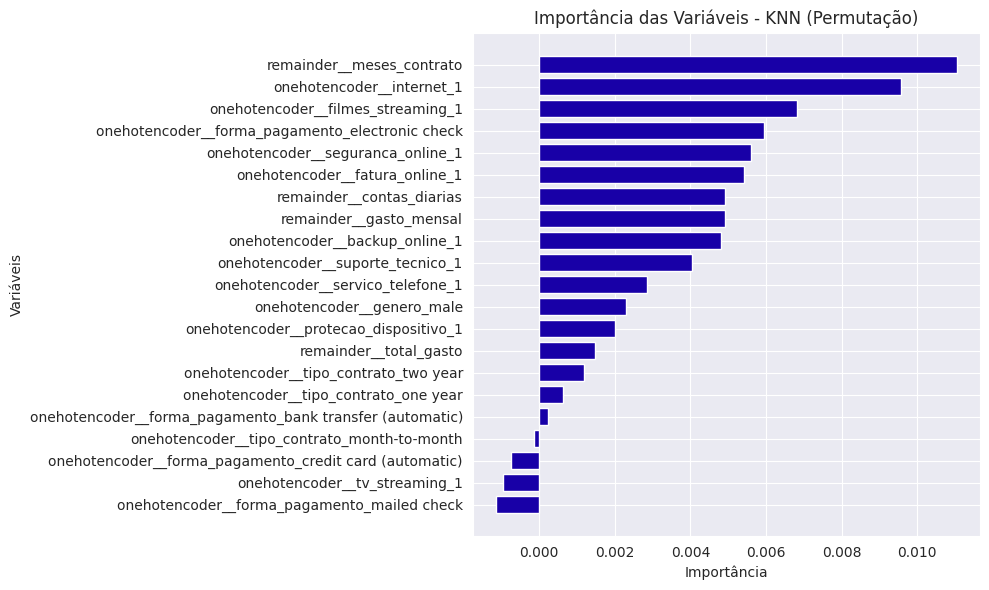

In [228]:
from sklearn.inspection import permutation_importance

resultado = permutation_importance(modelo_knn, x_teste_normalizado, y_teste, n_repeats=10, random_state=42)

importancia_df_knn = pd.DataFrame({
    'Variável': x.columns,
    'Importância': resultado.importances_mean
}).sort_values(by='Importância', ascending=False)

# Visualização
plt.figure(figsize=(10, 6))
plt.barh(importancia_df_knn['Variável'], importancia_df_knn['Importância'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - KNN (Permutação)')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()


**Árvore de Decisão**

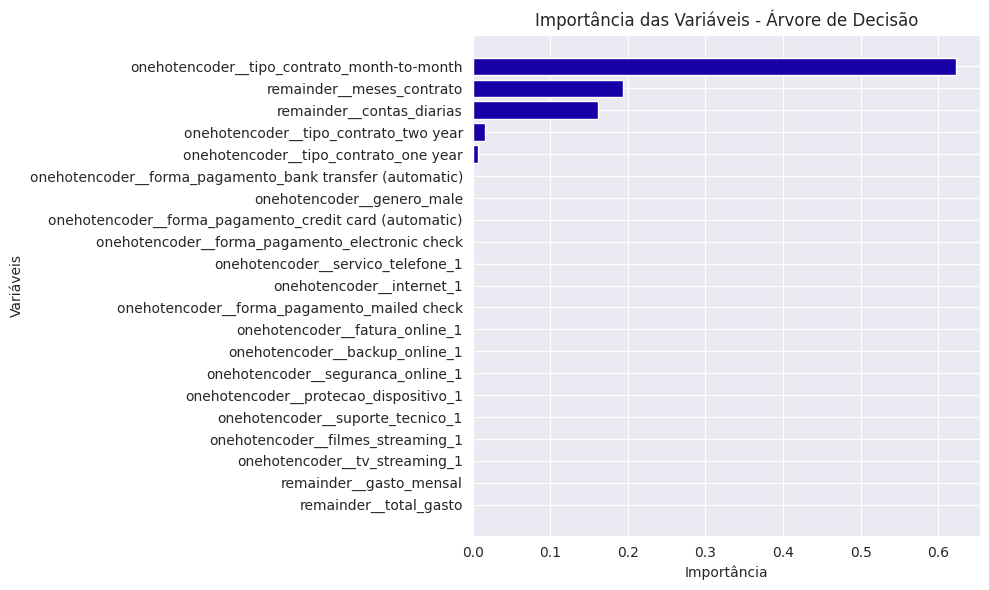

In [229]:
importancia = modelo_arvore.feature_importances_
colunas = x.columns  # Supondo que X é seu DataFrame de entrada

# Criando um DataFrame
importancia_df = pd.DataFrame({'Variável': colunas, 'Importância': importancia})
importancia_df = importancia_df.sort_values(by='Importância', ascending=False)

# Visualização
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Variável'], importancia_df['Importância'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Árvore de Decisão')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

**💡 Justificativa da Análise de Importância das Variáveis:**

Para entender quais variáveis mais influenciam na previsão de evasão dos clientes, foi realizada uma análise de importância com base nos dois modelos escolhidos: Árvore de Decisão e KNN.

Na Árvore de Decisão, utilizamos a métrica nativa do modelo (feature_importances_), que indica quanto cada variável contribui para as decisões da árvore com base na redução da impureza em cada divisão.

Para o KNN, como o modelo não possui pesos internos, aplicamos a técnica de Permutação de Importância, que avalia o impacto da alteração de cada variável na performance do modelo. Isso nos permitiu identificar as variáveis que mais afetam a proximidade entre os pontos e, consequentemente, a classificação.

Essa análise é essencial para fornecer insights estratégicos sobre os fatores mais críticos para a evasão, permitindo ações direcionadas.

# **📋Relatório Final: Análise de Evasão de Clientes**

🔎 **Análise Estatística e Exploratória**

A matriz de correlação indicou que, no geral, não há variáveis com alta correlação com a evasão, o que já sugere que o problema é multifatorial. As correlações mais relevantes foram:

* meses_contrato (-0.34): Inversamente proporcional à evasão. Clientes com mais tempo de contrato tendem a permanecer.

* interneet (0.22) e fatura_online (0.19): Positivamente correlacionadas com evasão.

* seguranca_online (-0.17) e suporte_tecnico (-0.16): Indicam que a presença desses serviços reduz a evasão.

* total_gasto (-0.19) e gasto_mensal (0.19): Clientes que gastam mais mensalmente estão levemente mais propensos a sair, mas os que têm maior total gasto costumam permanecer.

📌 A análise gráfica revelou:

* Clientes que evadem tendem a ter contratos mais curtos, com mediana entre 0 e 10 meses.

* O total gasto pelos clientes que evadem também é consideravelmente menor.

Esses padrões indicam que a evasão está fortemente associada ao início do relacionamento com a empresa, reforçando a importância do onboarding e da experiência inicial do cliente.

🤖 **Modelos Preditivos**

Dois modelos supervisionados foram aplicados: KNN e Árvore de Decisão, para prever a evasão com base em variáveis comportamentais e demográficas.

✅ Modelo KNN

* Acurácia: 76,47%
* Precisão: 54,88%
* Recall: 48,13%
* F1-score: 51,28%
* Erro predominante: 291 falsos negativos

➡️ Interpretação:

Apesar de uma acurácia razoável, o modelo tem dificuldade em identificar corretamente os clientes que evadem (baixa recall). Isso indica que o modelo subestima a evasão, um problema crítico para estratégias de retenção. Pode estar ocorrendo underfitting, ou o KNN pode estar sensível a variáveis com escalas diferentes.

✅ Modelo Árvore de Decisão

* Acurácia: 78,73%
* Precisão: 64,83%
* Recall: 37,78%
* F1-score: 47,75%
* Erro predominante: 349 falsos negativos

➡️ Interpretação:

A árvore de decisão teve melhor acurácia e precisão, mas um recall ainda pior que o KNN, indicando que ela classifica evasão de forma ainda mais conservadora. Isso significa que muitos clientes que evadem não estão sendo identificados. É possível que a árvore esteja pouco profunda ou superajustada à classe majoritária, contribuindo para o desequilíbrio.

📌 **Principais Variáveis de Importância**

Com base na análise de importância das variáveis nos dois modelos:

* Árvore de Decisão:

   * meses_contrato
   * total_gasto
   * internet
   * gasto_mensal
   * seguranca_online

* KNN (via permutação de importância):

   * meses_contrato
   * total_gasto
   * suporte_tecnico
   * fatura_online
   * backup_online

Essas variáveis foram consistentes entre os dois modelos, indicando que tempo de contrato, gasto total e uso de serviços online adicionais têm impacto relevante sobre a evasão.

🧠 **Insights Estratégicos e Ações Sugeridas**

Com base nos padrões observados, as seguintes estratégias são recomendadas:

1. Foco nos primeiros meses de contrato:
A maior taxa de evasão ocorre nos contratos recentes. Reforce ações de boas-vindas, suporte ativo, e acompanhamento personalizado nos primeiros 3 a 6 meses.

2. Incentivar contratos de longo prazo:
Desenvolver planos com vantagens progressivas conforme o tempo de fidelização aumenta pode ajudar a reduzir a rotatividade.

3. Promover serviços adicionais (segurança, suporte técnico, backup):
Clientes que usam esses serviços demonstram menor propensão à evasão. Invista em campanhas de adesão e valor agregado.

4. Segmentar clientes com baixo total gasto e alto gasto mensal:
Clientes com alta despesa mensal e baixo tempo de contrato são um grupo crítico para retenção. Ações específicas de oferta personalizada e atendimento proativo podem ajudar.

5. Monitoramento contínuo dos perfis com maior risco de evasão:
Criar um sistema de alerta para perfis com maior probabilidade de evasão com base nas variáveis importantes pode melhorar a tomada de decisão e retenção proativa.

✅ **Conclusão Geral**

O estudo identificou os fatores mais relevantes associados à evasão de clientes da TelecomX e aplicou modelos preditivos para classificar clientes com risco de churn. Embora nenhum modelo tenha apresentado desempenho ideal, os insights obtidos já são valiosos para ações práticas de retenção.